# Predicting the Size and Impact of California Wildfires 
Andreas Hindman, Oscar Avatare, Saurav Kharb, Sharan Jhangiani


## Purpose

Recent media coverage seems to echo the nation's growing concern over the impact of wildland fires. Cumulatively, the top 10 fires in California have set aflame to millions of acres and damages thousands of structures.<sup>1</sup> Depending on their location, some of the larger California wildland fires have claimed the lives of dozens. In mid-November of 2018, the _Camp Fire_ in northern California killed 85 people.<sup>2,6</sup> The alarming death tolls alone provide enough reason to attempt to predict the potential impact of wildland fires. Environmental and economic damages are also a concern for homeowners, residents, insurers, governments, and nearby communities. For these reasons, it is no surprise that efforts to predict the behavior and effects of wildfires have already been made.

A 2016 report by the U.S. Fire Administration shows a general decrease in fire-related death trend.<sup>3</sup> This could be attributed to advancements in predictive and preventative technology, medical technology and techniques, or safer construction regulations/guidelines. However, previous attempts at predicting the behavior of wildfires have suffered from a lack of funding. This means that the practical applications of the models described in literature are lacking.<sup>4</sup> Additionally, much of this research (and it's associated models) pre-dates the scientific research showing that "wildfire activity increased suddenly and markedly in the mid-1980s, with higher large-wildfire frequency, longer wildfire durations, and longer wildfire seasons." — In fact, wildfire activity in the Western United States forests is thought to have increased in recent decades due to "increased spring and summer temperatures and an earlier spring snowmelt."<sup>5</sup> 

_The devastating and unpredictable nature of wildfires puts the lives of thousands of homeowners, firefighters, respondents, at risk._

The purpose of this project is to better predict the size of wildfires in California. Due to the changing climate, the problems caused by wildfires in the western United States and California specifically are more pertinent than ever.<sup>5</sup> Accurate prediction models will allow communities to evacuate individuals and families at the appropriate time and place. This project limits the scope of the models to California wildfires, but the features used by the model are not specific the region. These models and techniques could be applied to any geographical locations that experience wildfires, assuming similar data is attainable. Models or technologies that provide accurate information regarding where and when to deploy containment efforts will have the potential to save hundreds, if not thousands, of lives.


1. https://www.iii.org/fact-statistic/facts-statistics-wildfires
2. https://www.theguardian.com/us-news/video/2018/nov/13/camp-fire-deadliest-wildfire-california-history-video-report 
3. https://www.usfa.fema.gov/data/statistics/fire_death_rates.html 
4. https://www.fs.fed.us/rm/pubs_series/int/gtr/int_gtr030.pdf
5. http://science.sciencemag.org/content/313/5789/940 
6. https://www.usatoday.com/story/news/2018/12/03/camp-fire-death-toll-california-deadliest-wildfire/2199035002/

## Exploring the Data
Our primary [data source](https://www.fs.usda.gov/rds/archive/Product/RDS-2013-0009.4/) for wildfire related data contains records of 1.88 Million U.S. wildfires from the United States Department of Agriculture's Forest Service. This data publication contains a spatial database of wildfires that occurred in the United States from 1992 to 2015. It is the third update of a publication originally generated to support the national Fire Program Analysis (FPA) system. The wildfire records were acquired from the reporting systems of federal, state, and local fire organizations.

To suppliment our models, we also used California climate data that was [requested](https://www.ncdc.noaa.gov/cdo-web/orders?email=skharb@uw.edu&id=1562545) from NOAA. This curated dataset contains various features related to temperature, precipitation, humidity, snowfall, and other climate variables for California in 2010. We joined these two datasets on longitude/latitude so that features from both could be used to predict fire size. A smaller dataset that contains the relevant subset of joined data that is used for our models can be found in our GitHub [repository](https://github.com/sjhangiani12/info370-final-project/tree/master/data). A link to a more detailed Jupyter notebook containing our data preparation process can be found [here](https://github.com/sjhangiani12/info370-final-project/blob/master/Data%20Prep.ipynb).

### Features & Missing Values
Missing values are scattered (mostly) randomly throughout the dataset with the exception of certain climate variables, some of which contain mostly missing values. These missing values could impact the statistical models if they mask any correlation. One option to handle these is to remove rows with missing values entirely. However, this would result in most of our rows being deleted. As long as an insignificant portion of the rows contain missing values, the models should not be affected dramatically. In an effort to maximize our effective data and to limit the scope of the project, we used a subset of the dataset that had sufficient data. Some years have a higher proportion of missing values, which can be seen below.

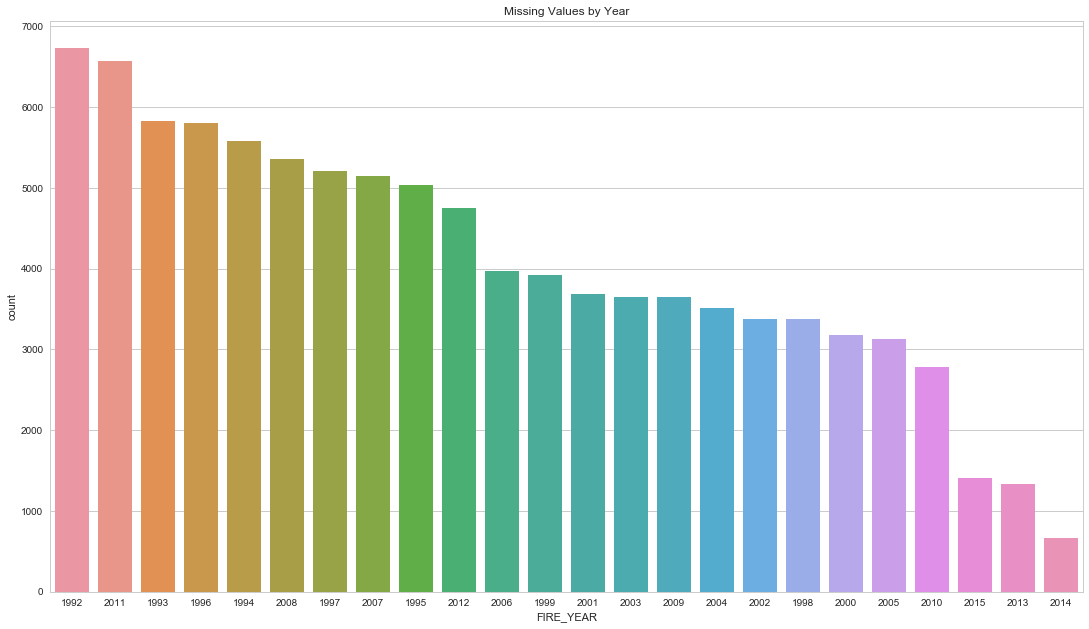

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# read the relevant subset of data
fires = pd.read_csv('data/california_fires.csv')

# select rows where date value is null
no_date_fires = fires[fires['CONT_DATE'].isnull()]

sns.set(style="whitegrid")
g = sns.countplot(pd.Series(no_date_fires.FIRE_YEAR), order = pd.Series(no_date_fires.FIRE_YEAR).value_counts().index).set_title('Missing Values by Year')
g.figure.set_size_inches(18.5, 10.5)

A number of the features in the original wildfire dataset could be used as predictor variables, as lat/long coordinates, county, time of year, while others were effectively different ways of identifying fires (multiple ID's). We removed additional identifier columns, as well as columns that did not have pertinent information. Part of our research question is to determine whether there is a correlation between climate variables and fire size. Specifically, wanted to see how temperature, precipitation, and humidity affect fire size, as well as any other climate features that can be accessed. 

Since we were able to get geographical climate data for 2010, and since 2010 had relatively few missing values, we only used the 2010 subset of wildfire data. After that, we used recursive feature elimination (RFE) to determine the most effective set of features. Then, we cross-referenced the top features with the set of columns based on the proportion of missing values. Of the top features that were selected by RFE, the highest proportion of missing values was 0.22, so we removed climate features that had more than 25% missing values. View the [modelling](https://github.com/sjhangiani12/info370-final-project/blob/master/Modelling.ipynb) and [feature](https://github.com/sjhangiani12/info370-final-project/blob/master/Fire%20Data%20Feature%20Selection.ipynb) selection notebooks in the repository explore this process in more detail.

Finally, we were able to handle the rest of the missing values using forward fill. Since the remaining missing values were continuous climate variables scattered (mostly) randomly throughout the dataset without long streaks, this method of handling missing values was appropriate. 

### Insights
We intend to predict the size of wildfires based on the relevant fire and climate data that we were able to acquire and merge. Our final dataset contains all wildfires in 2010 in California as well as climate variables based on date and location. 

Fire size is presented in two ways in this dataset: FIRE_SIZE describes the continuous size in acreage while FIRE_SIZE_CLASS categorizes the fire on a scale from 'A' to 'G', where 'A' classifies the smallest fires and 'G' being attributed to the largest fires. Here is a breakdown of how wildfires are classified based on acreage:

* 'A' = '0-0.25 acres'
* 'B' = '0.26-9.9 acres '
* 'C' = '10.0-99.9 acres'
* 'D' = '100-299 acres'
* 'E' = '300-999 acres'
* 'F' = '1000-4999 acres'
* 'G' = '5000+ acres'

For this project, we decided to focus on a classifying model to predict the category that a fire might fall into based on pertinent variables. Due to the highly (left) skewed distribution of continuous wildfire size data, a regression model would be more difficult to interpret. The classification scale takes the logarithmic distribution into account and will lead to a more interpretable model. 

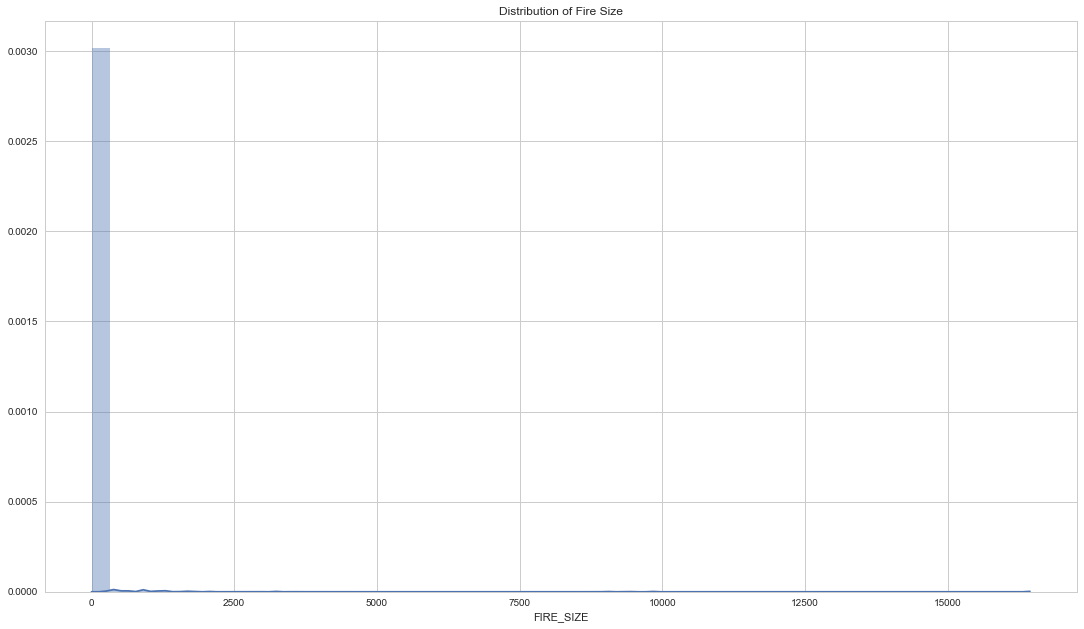

In [6]:
# What is the distribution of wildfire size
data = pd.read_csv('data/combinedClimateFiresDataset_2010.csv')

sns.set(style="whitegrid")
g = sns.distplot(pd.Series(data.FIRE_SIZE)).set_title('Distribution of Fire Size')
g.figure.set_size_inches(18.5, 10.5)

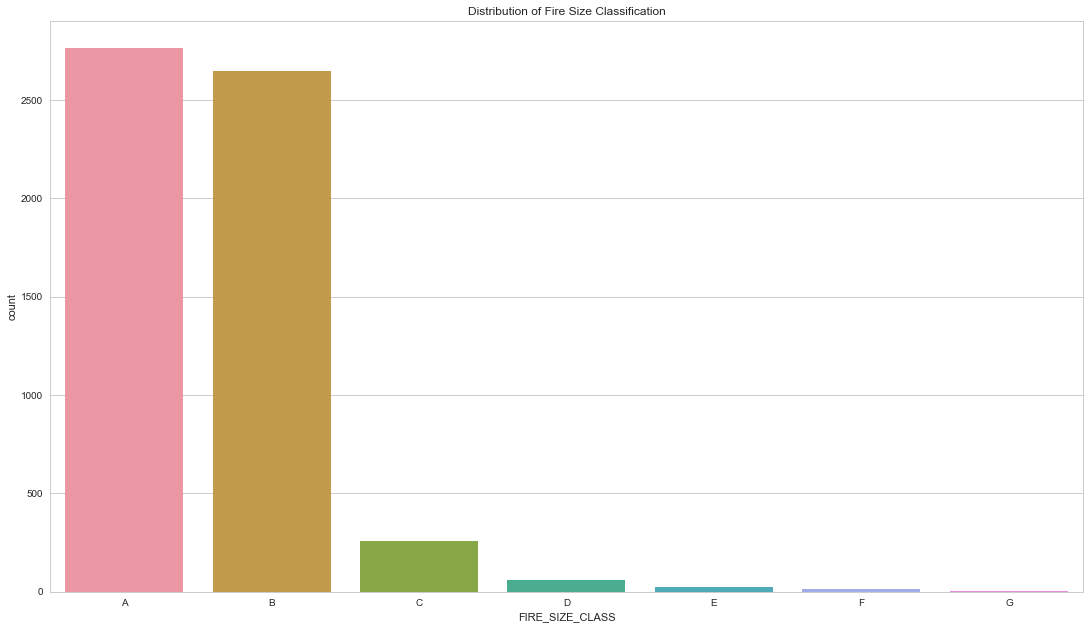

In [7]:
# What is the distribution of wildfire size
data = pd.read_csv('data/combinedClimateFiresDataset_2010.csv')

sns.set(style="whitegrid")
g = sns.countplot(pd.Series(data.FIRE_SIZE_CLASS), order = pd.Series(data.FIRE_SIZE_CLASS).value_counts().index).set_title('Distribution of Fire Size Classification')
g.figure.set_size_inches(18.5, 10.5)

From these two distributions, we can see that the categorical size is significantly more interpretable because the categories are logarithmic and take the original distribution into account. We can also make insights based on these distributions: most wildfires can be categorized as 'A' or 'B' fires. This means that relatively larger fires (class 'C' and above, in this case) only occur in a fraction of wildfire incidents. If the relatively few larger fires correlate with the environemntal variables that we have provided, then an accurate and interpretable model can also be produced.

In addition to climate variables, we predicted that the cause of a fire might be a predictor for fire size and impact. _What are the causes of the most dangerous fires?_

Shown below is a distribution of wildfire causes. 

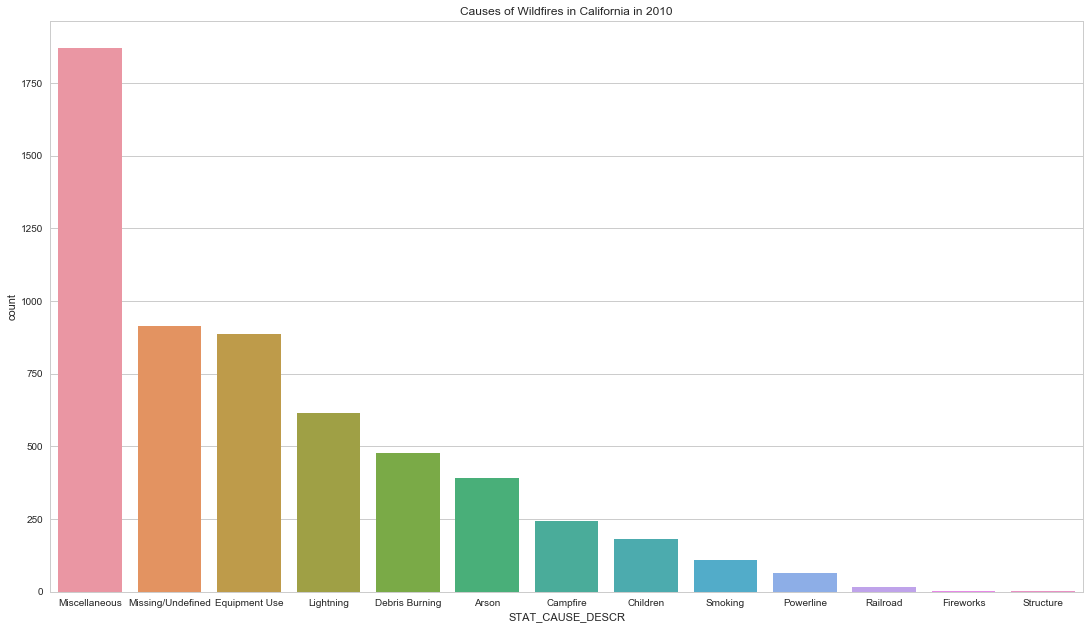

In [8]:
sns.set(style="whitegrid")
g = sns.countplot(pd.Series(data.STAT_CAUSE_DESCR), order = pd.Series(data.STAT_CAUSE_DESCR).value_counts().index).set_title('Causes of Wildfires in California in 2010')
g.figure.set_size_inches(18.5, 10.5)

Contrary to our original hypothesis, the most frequent (known) causes of wildfires are equipment use and lightning while the least frequent causes are structure fires and fireworks. However, we want to know which of these result in the most damaging (or largest) fires.

In addition to the feature selection used in our [modelling process](https://github.com/sjhangiani12/info370-final-project/blob/master/Modelling.ipynb), we used a correlation matrix to visualize which climate and fire variables have a strong correlation with fire size. 

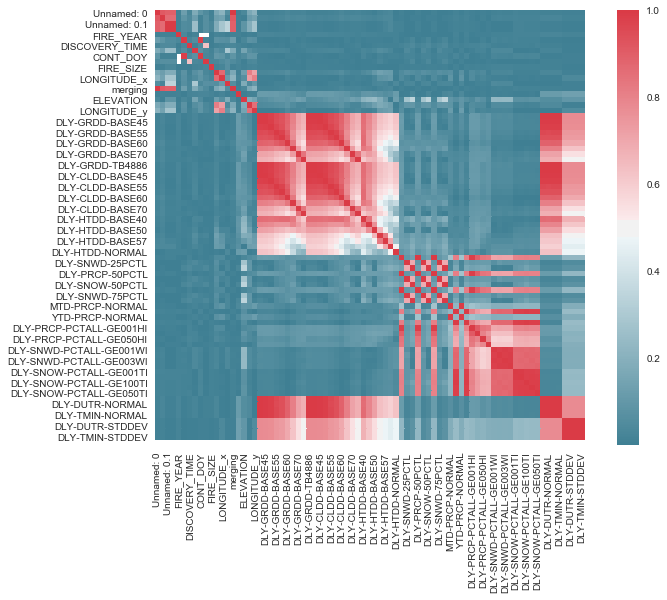

In [9]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr.abs(), mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax);

While many of the climate variables correlate to each other (which is to be expected), there is relatively little correlation with fire size, meaning that our climate variables have a low chance of providing a rigorous model. If this is the case, it will be revealed by the accuracy of our models. Perhaps climate variables are not a great predictor for fire size and other features (such as vegetation or structure density) would provide a more predictive model for future research.

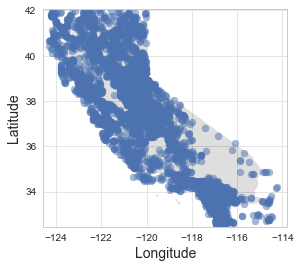

In [13]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
california_img=mpimg.imread('./images/BlankMap-USA-California.png')
plt.scatter(data['LONGITUDE_x'],data['LATITUDE_x'], zorder=2, alpha=.5, )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5, zorder=1)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

This map shows the occurences of wildfires in 2010 overlayed on a map of california.

## Technical Models
A link to a more detailed Jupyter notebook containing our modelling process can be found [here](https://github.com/sjhangiani12/info370-final-project/blob/master/Modelling.ipynb).

We performed hyper tuning for most of the models and narrowed down the best working parameters before the models are rerun with narrowed parameters. All of our models fall within the realm of supervised learning, as we know our output data and we are now trying to assess how accurately we can predict fires in California based on our models.

#### KNN:

A KNN Classifier works by finding the K nearest neighbors closest to it through a distance function, wherein the classification occurs due to a majority vote amongst its members. 

Because of our choice to classify fires by size, we felt that this was an appropriate algorithm to use because it does this.

#### Ridge Classifier:
A Ridge CV classifier works by classifying values into buckets based upon their predicted value, as well as based on their features that we have selected above.

#### Random Forest:
A random forest model works by aggregating the results of simpler estimators within it. This inherently builds off of decision trees because of the classfication built into decision trees with the series of questions that they ask. In this case, the nodes are prone to overfitting, so a random forest allows you to select an amount of estimators, and randomizes the process, allowing for classification to be much more accurate.

#### Gradient Boosting:
The Gradient Boosting model is valuable since it improves the output of classifer models. It does this by either adding or subtracting trees until there is no further improvement, increases or decreases the depth of trees or the amount of nodes within the model, or puts contraints upon splits within the data.

## Results
A link to a more detailed Jupyter notebook containing our results can be found [here](https://github.com/sjhangiani12/info370-final-project/blob/master/Modelling.ipynb).

By using recursive feature elimination, we were able to determine that our best predictive features would be latitude, longitude, precipitation (on both a daily, monthly, and yearly scale), as well as the maximium, minimum, and average temperatures for that year. Given our understanding of the causes of fires, and seeing our visualization of the causes them, we can see how precipitation and temperature would be crucial and predictive causes within predicting this.

![KNNvsRFCvsRidge](./images/KNNvsRFCvsRidge.png "KNNvsRFCvsRidge")

Based on our implementation, and the power of the Random Forest model, it gave us the most accurate results. This is unsurprising considering the power that this model has when it comes to classification.

![GBCvsRFC](./images/GBCvsRFC.png "GBCvsRFC")

Ultimately, given our data, it seems that the Gradient Boost gave us results almost equivalent to our best model, the Random Forest.